In [1]:
import bp_sql as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tgt_db = 'SPP.db'

conn = bp.create_connection(db_name=tgt_db)

df = pd.read_sql_query('''Select*
                          FROM ercot_avg_spp
                       where settlement_point_name in ('LZ_NORTH','LZ_WEST','LZ_HOUSTON','LZ_SOUTH')
                       ''', con=conn)
df['DELIVERY_DATE'] = pd.to_datetime(df['DELIVERY_DATE'])
df['DELIVERY_HOUR'] = df['DELIVERY_HOUR'].astype(int)
df['dt']= df['DELIVERY_DATE'] + pd.to_timedelta(df['DELIVERY_HOUR']-1,unit='h')
df['year'] = df.DELIVERY_DATE.dt.year

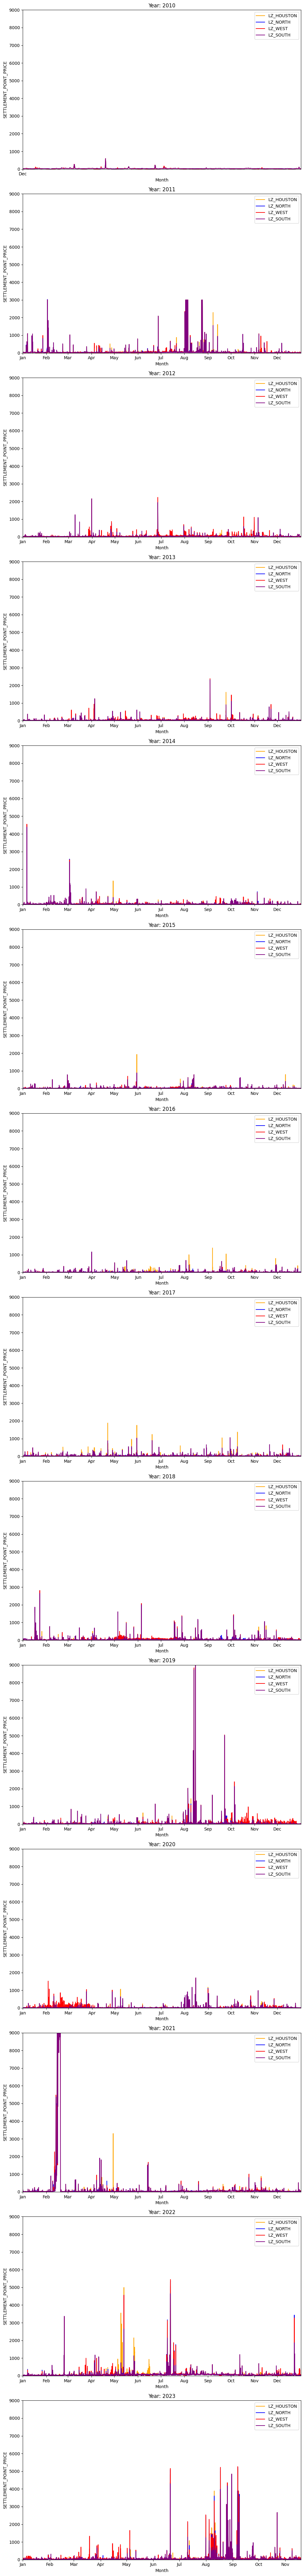

In [5]:
# Get unique years in the dataset
unique_years = df['year'].unique()

# Color mapping dictionary for specified SETTLEMENT_POINT_NAMEs
color_mapping = {
    'LZ_HOUSTON': 'orange',
    'LZ_NORTH': 'blue',
    'LZ_WEST': 'red',
    'LZ_SOUTH': 'purple'
}

# Plotting data for each year on separate subplots without sharing x-axis
fig, axes = plt.subplots(len(unique_years), 1, figsize=(10, 6 * len(unique_years)), sharex=False)

# Plotting data for each year on separate subplots
for i, year in enumerate(unique_years):
    ax = axes[i]
    year_data = df[df['year'] == year]
    
    # Extracting specific SETTLEMENT_POINT_NAMEs
    specific_settlements = year_data[year_data['SETTLEMENT_POINT_NAME'].isin(color_mapping.keys())]
    
    for settlement, color in color_mapping.items():
        settlement_data = specific_settlements[specific_settlements['SETTLEMENT_POINT_NAME'] == settlement]
        ax.plot(settlement_data['dt'], settlement_data['SETTLEMENT_POINT_PRICE'], label=settlement, color=color)
    
    ax.set_title(f'Year: {year}')
    ax.legend()
    ax.set_ylabel('SETTLEMENT_POINT_PRICE')
    
    # Set x-axis ticks for months only
    ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
    
    # Set x-axis limits to the specific year's data
    min_date = year_data['dt'].min()
    max_date = year_data['dt'].max()
    ax.set_xlim(min_date, max_date)
    
    # Setting maximum y-axis limit to 9000
    ax.set_ylim(0, 9000)
    
    # Adding x-axis label to each subplot
    ax.set_xlabel('Month')

plt.tight_layout()
plt.show()